# Introduction

## Selfie Related Injuries
### Dataset with details of selfie related injuries or deaths


### About the DataSet

- This is a dataset containing a list of serious injuries and deaths in which one or more subjects of a selfie were killed or injured before, during, or after taking a photo of themselves, with the accident at least in part attributed to taking the photo.

# Analyze and Explore DataSet

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS


In [2]:
#Importing the  dataset

df=pd.read_csv("../input/selfie-related-injuries/Selfie_Related_Injuries.csv")

In [3]:
# looking the data set
df.head()

,Date,Country,Injuries/Casualties,Type,Description
0,15 October 2011,United States,3,Transport,Three teenagers (two sisters and a friend) wer...
1,March 2014,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...
2,March 2014,Russia,1,Transport,Two people were walking near train tracks when...
3,April 2014,United States,1,Transport,A 32-year-old woman from North Carolina was dr...
4,22 April 2014,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...


In [4]:
 #print the shape dataset
print("Shape The DataSet ", df.shape )

Shape The DataSet  (192, 5)


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 192 non-null    object
 1   Country              192 non-null    object
 2   Injuries/Casualties  192 non-null    int64 
 3   Type                 192 non-null    object
 4   Description          192 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.6+ KB


In [6]:
# change the data type column Data from object to Datatime

df["Date"]=pd.to_datetime(df["Date"])

In [7]:
#checking null value 
df.isna().sum()

Date                   0
Country                0
Injuries/Casualties    0
Type                   0
Description            0
dtype: int64

- Inference: No any missing data

In [8]:
# Describe value data set
df.describe().round(2)

,Injuries/Casualties
count,192.00
mean,1.83
std,3.63
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,48.00


- Inference: I see we have value outliner looking the max 48 and the mean 1.83

In [9]:
# the value outliner 
df['Injuries/Casualties'].sort_values(ascending=False).head(5)

141    48
189    11
187     9
140     8
22      7
Name: Injuries/Casualties, dtype: int64

In [10]:
# drop the outliner
df.drop(index=141, inplace=True)

In [11]:
df.describe().round(2)

,Injuries/Casualties
count,191.00
mean,1.59
std,1.41
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,11.00


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


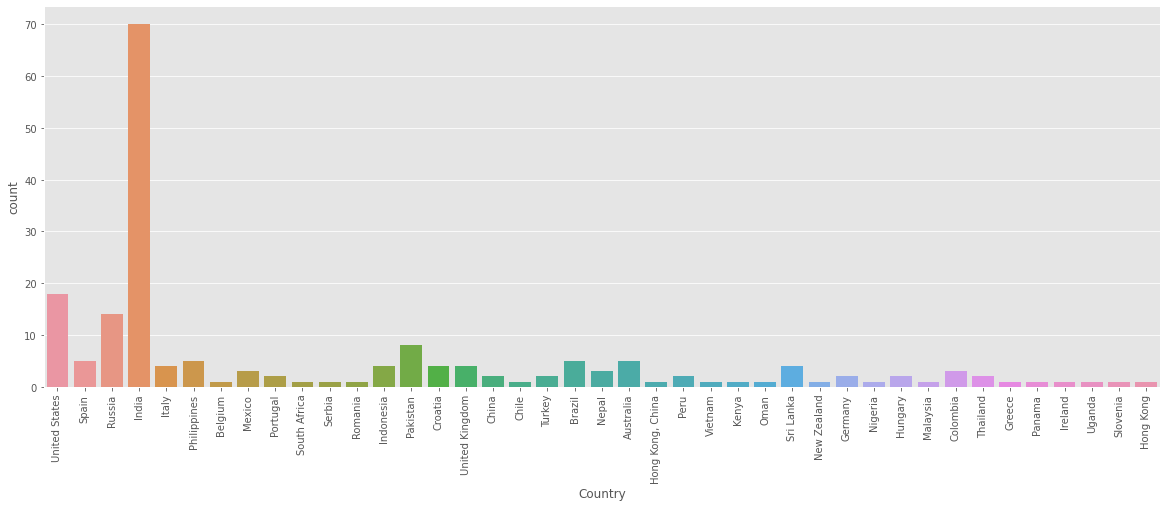

In [12]:
# how much repeat the Country in the dataset

plt.figure(figsize=(20,7))
sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.show()

- Inference: The India have highest country repeat

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


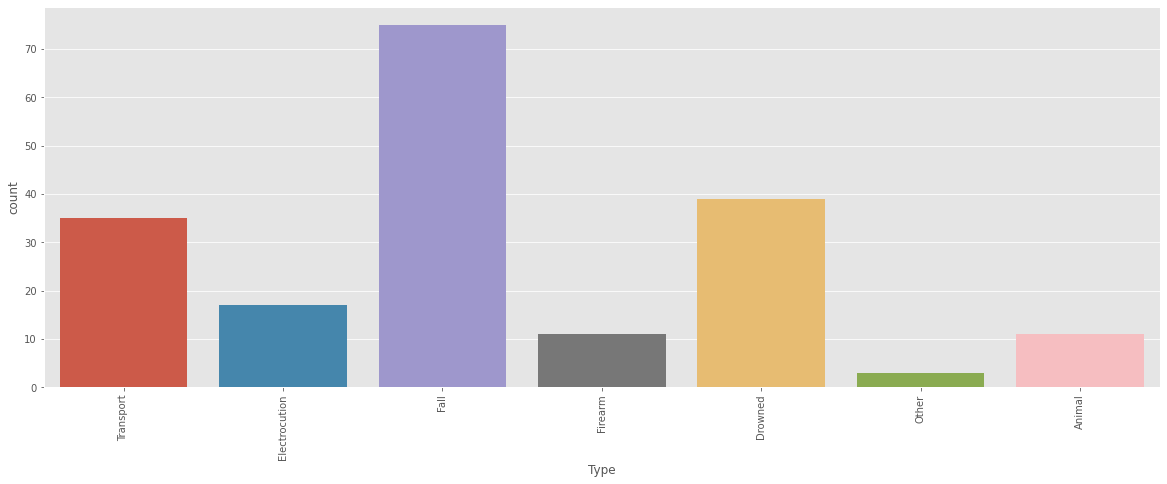

In [13]:
# how much repeat the Type in the dataset

plt.figure(figsize=(20,7))
sns.countplot(df['Type'])
plt.xticks(rotation=90)
plt.show()

- Inference: The type Fall  have highest  repeat

<AxesSubplot:xlabel='Date', ylabel='Injuries/Casualties'>

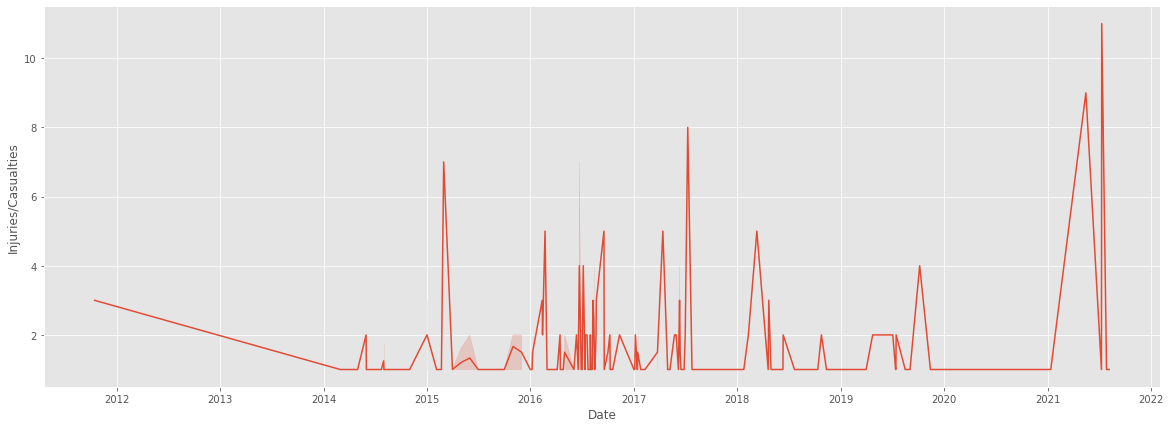

In [14]:
# the average Injuries by the time

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Date",y="Injuries/Casualties")

In [15]:
# interactive graph between the injuries and the type by the time 

px.scatter(df,x="Date",y="Injuries/Casualties", animation_frame="Type")

# Analysis

In [16]:
# make group by - Country

high=df.groupby("Country").sum()
high.sort_values(by="Injuries/Casualties",ascending=False)

,Injuries/Casualties
Country,
India,139
United States,26
Russia,19
Pakistan,14
Indonesia,12
Brazil,7
Sri Lanka,6
Spain,6
Philippines,5


- The highest 5 countries : India= 139 / United States= 26 / Russia= 19 / Pakistan= 14 / Indonesia =12

<AxesSubplot:xlabel='Country'>

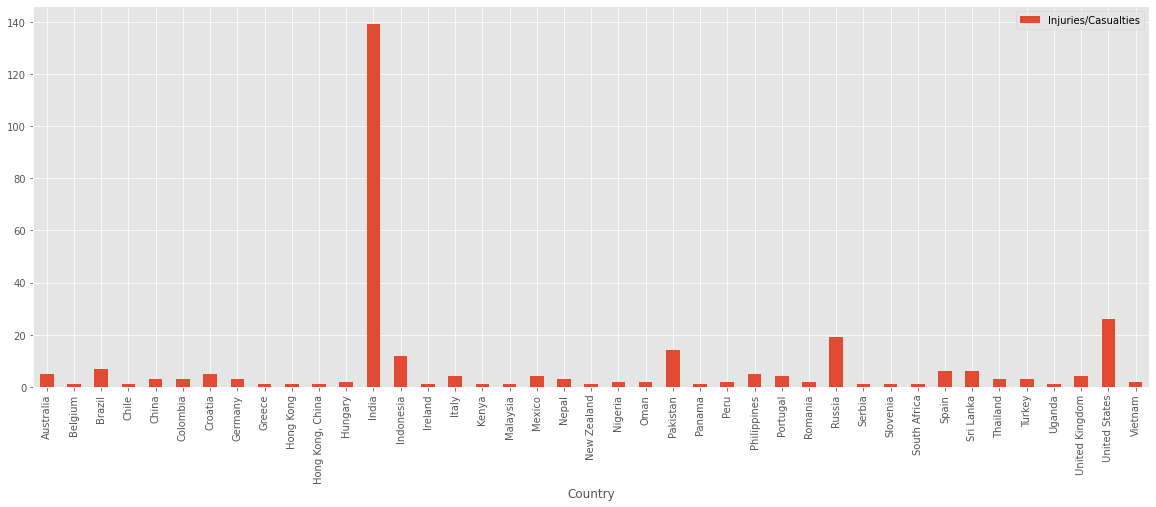

In [17]:
# make graph the group by
high.plot(kind="bar",figsize=(20,7))

In [18]:
# make group by - Type 

high_t=df.groupby("Type").sum()
high_t.sort_values(by="Injuries/Casualties",ascending=False)

,Injuries/Casualties
Type,
Drowned,98
Fall,90
Transport,57
Electrocution,30
Animal,12
Firearm,11
Other,6


- The highest type :Drowned and Fall

<AxesSubplot:xlabel='Type'>

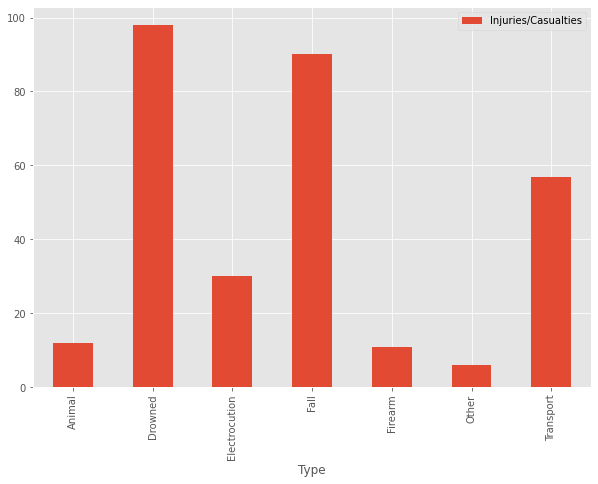

In [19]:
# make graph the group by
high_t.plot(kind="bar",figsize=(10,7))

In [20]:
# making pivot_table 

pivot_table=df.pivot_table(columns="Type",index="Country",values="Injuries/Casualties")
pivot_table.fillna(0)

Type,Animal,Drowned,Electrocution,Fall,Firearm,Other,Transport
Country,,,,,,,
Australia,0.0,0.0,0.000000,1.00,1.0,0.0,0.000000
Belgium,0.0,0.0,0.000000,0.00,0.0,0.0,1.000000
Brazil,0.0,0.0,0.000000,1.40,0.0,0.0,0.000000
Chile,0.0,0.0,0.000000,0.00,0.0,1.0,0.000000
China,2.0,0.0,0.000000,1.00,0.0,0.0,0.000000
Colombia,0.0,0.0,0.000000,1.00,0.0,0.0,0.000000
Croatia,0.0,0.0,1.500000,1.00,0.0,0.0,0.000000
Germany,0.0,2.0,0.000000,0.00,0.0,0.0,1.000000
Greece,0.0,0.0,0.000000,1.00,0.0,0.0,0.000000


## About the Description

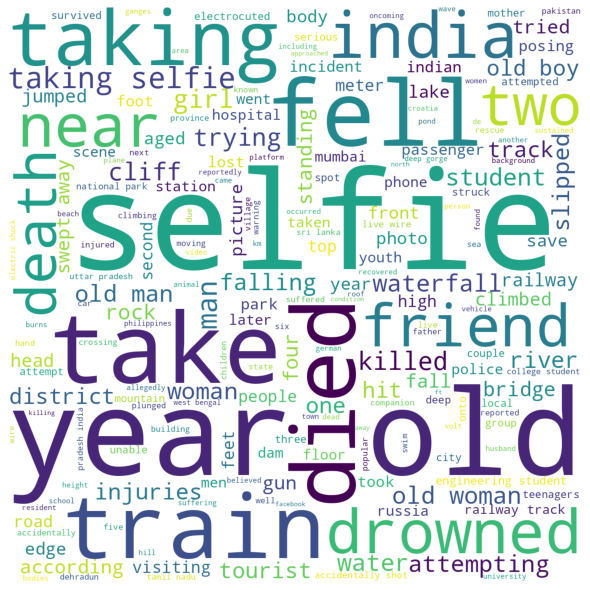

In [21]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

- Inference: we see the highest word repeated in the description

# Results

## Results the Analysis the DataSet


### The average injuries are close over the years, but after 2020 it increased = maybe because of Corona


### The highest 5 countries : India= 139 / United States= 26 / Russia= 19 / Pakistan= 14 / Indonesia =12

- Perhaps the reasons are only the population density 


### The highest type : Drowned and Fall 

- The reasons are mistakes while shooting, photography while swimming is dangerous and also at heights

## Please pay attention when taking a selfie

# The End

### Thank for reading my analysis , 
### If you any questions or advice me please write in the comment , 


### also if you liked my analysis vote me ,